### 1. Imports

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2. Load Data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


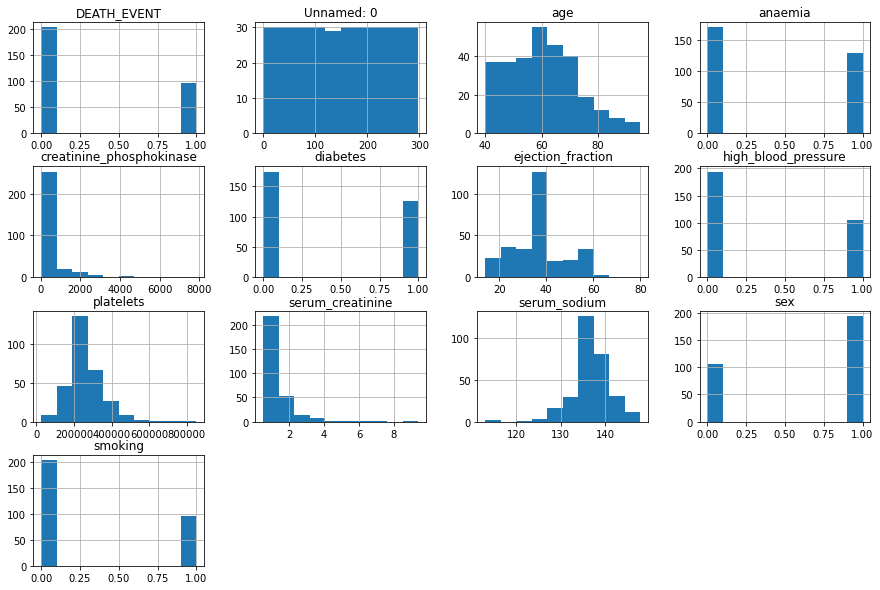

In [79]:
hf_cleaned=pd.read_csv('hf_data_cleaned.csv')
hf_cleaned.hist(figsize=(15,10))
hf_cleaned.drop('Unnamed: 0',axis=1,inplace=True)
hf_cleaned.describe()

### 3. Remove Extreme outliers
Since the histograms above show some extreme outliers(such as in the case of serum_creatinine levels), and we are working with a relatively small dataset, remove all observations containing a volumn value that is greater than 3 standard deviations.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,60.865993,0.429054,581.138514,0.412162,38.097973,0.354730,263738.826757,1.386385,136.827703,0.652027,0.320946,0.317568
std,11.929156,0.495779,974.211054,0.493058,11.805796,0.479242,97691.557334,1.036257,3.932573,0.477134,0.467631,0.466319
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,124.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,212750.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,249.500000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303250.000000,1.400000,140.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,1.000000


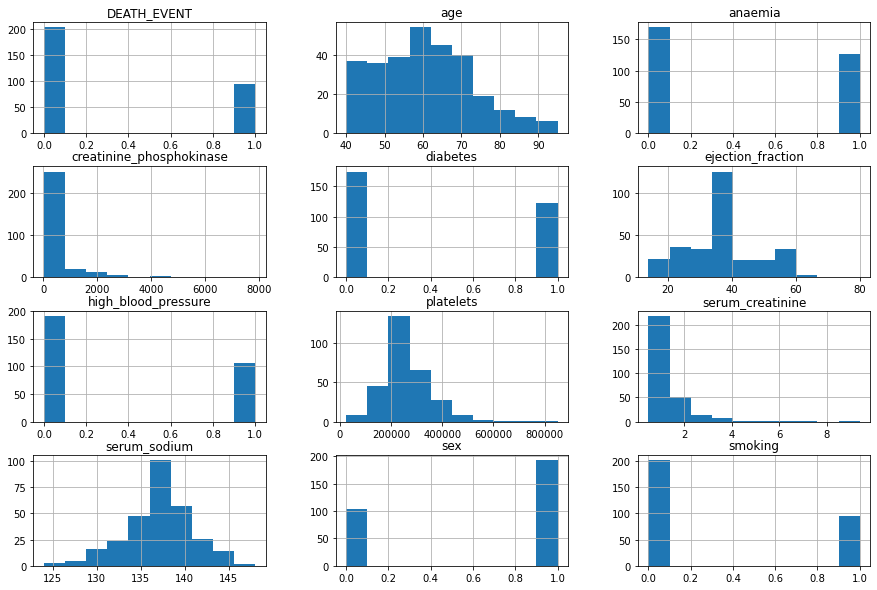

In [82]:
#remove outliers
features=list(new_df.columns)
numeric_features=[]
for col in features:
    if new_df[col].iloc[1]!=0 and new_df[col].iloc[1]!=1: #append only if column is not binarized
        numeric_features.append(col)
        
for col in numeric_features:
    new_df=hf_cleaned[(hf_cleaned[col]<hf_cleaned[col].mean()+3*hf_cleaned[col].std())&(hf_cleaned[col]>hf_cleaned[col].mean()-3*hf_cleaned[col].std())]
new_df.hist(figsize=(15,10))

#check new dataframe
new_df.describe()

#### 4. Scale Data
Except the categorical features that are already binarized, use standard scaler to scale the remaining features.

In [87]:
features=list(new_df.columns)
num_feat=[]
scaled_df=new_df

SS_scaler=StandardScaler()
for col in features:
    if new_df[col].iloc[1]!=0 and new_df[col].iloc[1]!=1: #append only if column is not binarized
        num_feat.append(col)
for col in num_feat:
    SS_scaler.fit(new_df[[col]])
    scaled_df[col]=SS_scaler.transform(new_df[[col]])
    
#check new dataframe
scaled_df.head()

<ipython-input-87-15b0f6a6bc93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[col]=SS_scaler.transform(new_df[[col]])
<ipython-input-87-15b0f6a6bc93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[col]=SS_scaler.transform(new_df[[col]])
<ipython-input-87-15b0f6a6bc93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,1.186835,0,0.000886,0,-1.535570,1,0.012932,0.496484,-1.739133,1,0,1
1,-0.492569,0,7.485226,0,-0.008313,0,-0.003905,-0.276833,-0.210830,1,0,1
2,0.347133,0,-0.447414,0,-1.535570,0,-1.043193,-0.083504,-1.993850,1,1,1
3,-0.912419,1,-0.483401,0,-1.535570,0,-0.551018,0.496484,0.043887,1,0,1
5,2.446388,1,-0.549207,0,0.161382,1,-0.612540,0.689813,-1.229698,1,1,1


### 5. Split Data
Split dataset into train set and test set

In [84]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop(columns='DEATH_EVENT'), 
                                                    scaled_df.DEATH_EVENT, test_size=0.25, 
                                                    random_state=10)

In [85]:
#check test set to make sure the dataset is split correctly
print(y_test)
X_test

292    0
89     0
94     0
61     1
121    0
      ..
209    0
194    1
271    0
275    0
153    0
Name: DEATH_EVENT, Length: 74, dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
292,-0.744479,0,-0.402173,1,-0.008313,0,1.212607,-0.373498,0.808038,1,1
89,-0.324628,1,-0.479288,0,-1.111332,1,-0.848374,-0.276833,1.826907,1,0
94,-0.240658,0,-0.449470,1,-0.008313,1,0.648657,-0.663492,1.317473,0,0
61,-0.912419,0,-0.270562,0,0.161382,1,-0.489496,0.883142,-1.484415,0,0
121,0.431104,1,-0.527614,1,-0.008313,1,-1.043193,-0.373498,-0.210830,0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,-0.996390,0,0.401888,1,-0.262856,1,0.043693,-0.566827,-1.739133,0,0
194,-1.332270,0,0.000886,0,-1.535570,1,-1.412324,0.206490,-0.465547,1,0
271,-0.828449,0,0.000886,1,0.161382,0,-0.438228,-0.470162,-0.720264,0,0
275,-1.332270,0,0.000886,0,-0.008313,1,1.622752,-0.566827,0.043887,0,0
